# Retail
## Capstone_Project_03

In [1]:
# First importing the necessary library.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas import ExcelWriter
%matplotlib inline

In [2]:
# Now ignoring the unusual warnings.
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Now Importing the dataset to perform further action.
retail_df = pd.read_excel("Online Retail.xlsx")

In [4]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail_df.shape

(541909, 8)

In [6]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Project Task: Week 1
## Data Cleaning:

### 1. Perform a preliminary data inspection and data cleaning.

### a. Check for missing data and formulate an apt strategy to treat them.

In [7]:
# Now checking the missing value in the data set.
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Checking the missing value in the percentage.
round((retail_df.isnull().sum()/len(retail_df))*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

We have two columns which contain the null values but both column has the unique identity so we can not replace them with the mean, median or mode.

So for deal with null value of customerID column. we will check with respect to customerID is any invoice no is present so with respect to that we can fill customer name. 

In [9]:
custid_null_treat = retail_df[retail_df['CustomerID'].isnull()]['InvoiceNo']

In [10]:
(retail_df["CustomerID"].isin(retail_df) & retail_df['InvoiceNo'].isin(custid_null_treat)).any()

False

We have checked that with repect to invoice no there is no customer id in the data set so we have to treat the null value by dropping the row.

In [11]:
retail_df.drop('Description', axis=1, inplace=True)
retail_df.dropna(inplace=True)

In [12]:
retail_df.shape

(406829, 7)

### b. Remove duplicate data records.

In [13]:
retail_df[retail_df.duplicated()]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...
541675,581538,22068,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


It is clear from the above observation that there is duplicate values in the data set so we will drop all duplicate values.

In [14]:
retail_df = retail_df.drop_duplicates()
retail_df.shape

(401602, 7)

### c. Perform descriptive analytics on the given data.

In [15]:
retail_df.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401602.000000,401602,401602.000000,401602.000000
mean,12.182579,2011-07-10 12:08:08.129839872,3.474064,15281.172576
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:00,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283248,NaN,69.764209,1714.002257


In [16]:
# we will also analysis the object type field in term of count, freq etc..
retail_df.describe(include = ['O'])

,InvoiceNo,StockCode,Country
count,401602,401602,401602
unique,22190,3684,37
top,576339,85123A,United Kingdom
freq,542,2065,356726


## Data Transformation:

### 2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

### a. Create month cohorts and analyze active customers for each cohort.

In [17]:
df = retail_df.groupby(pd.Grouper(key="InvoiceDate", axis=0, freq="M")).nunique()

In [18]:
monthwise_cohort = df['CustomerID']

In [19]:
monthwise_cohort

InvoiceDate
2010-12-31     948
2011-01-31     783
2011-02-28     798
2011-03-31    1020
2011-04-30     899
2011-05-31    1079
2011-06-30    1051
2011-07-31     993
2011-08-31     980
2011-09-30    1302
2011-10-31    1425
2011-11-30    1711
2011-12-31     686
Freq: M, Name: CustomerID, dtype: int64

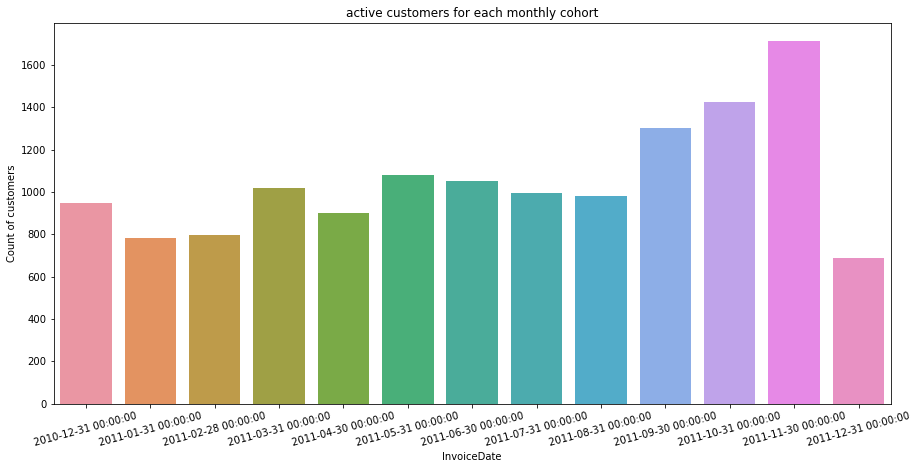

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(x = monthwise_cohort.index, y = monthwise_cohort.values)
plt.xticks(rotation = 15)
plt.title("active customers for each monthly cohort")
plt.ylabel("Count of customers")
plt.show()

### b. Analyze the retention rate of customers.

In [21]:
# Now we analyze the retention rate of the customer.
monthwise_cohort - monthwise_cohort.shift(1)

InvoiceDate
2010-12-31       NaN
2011-01-31    -165.0
2011-02-28      15.0
2011-03-31     222.0
2011-04-30    -121.0
2011-05-31     180.0
2011-06-30     -28.0
2011-07-31     -58.0
2011-08-31     -13.0
2011-09-30     322.0
2011-10-31     123.0
2011-11-30     286.0
2011-12-31   -1025.0
Freq: M, Name: CustomerID, dtype: float64

In [22]:
retention_rate = round((monthwise_cohort.pct_change())*100,2)
retention_rate

InvoiceDate
2010-12-31      NaN
2011-01-31   -17.41
2011-02-28     1.92
2011-03-31    27.82
2011-04-30   -11.86
2011-05-31    20.02
2011-06-30    -2.59
2011-07-31    -5.52
2011-08-31    -1.31
2011-09-30    32.86
2011-10-31     9.45
2011-11-30    20.07
2011-12-31   -59.91
Freq: M, Name: CustomerID, dtype: float64

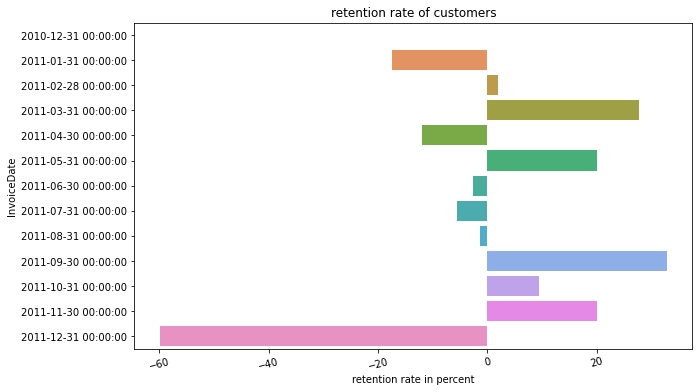

In [23]:
# lets visualize the retention rate.
plt.figure(figsize=(10,6))
sns.barplot(x = retention_rate.values, y = retention_rate.index)
plt.xticks(rotation = 15)
plt.title("retention rate of customers")
plt.xlabel("retention rate in percent")
plt.show()

## Project Task: Week 2
## Data Modeling :

### 1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

In [24]:
# First calculating the total price 
retail_df["TotalPrice"] = retail_df["Quantity"] * retail_df["UnitPrice"]

In [25]:
# We will make the refrence date +1 because we will get the transaction done on the last date.
from datetime import timedelta
refrence_date = (retail_df["InvoiceDate"].max()) + timedelta(days=1)
print("refrence Date: ", refrence_date)

refrence Date:  2011-12-10 12:50:00


In [26]:
RFM = retail_df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (refrence_date-x.max()).days,
                                            "InvoiceNo": "count",
                                            "TotalPrice": 'sum'})

### 2. Calculate RFM metrics.

In [27]:
RFM.rename(columns = {'InvoiceDate':"Recency", "InvoiceNo": "Frequency", "TotalPrice": "MonetaryValue"}, inplace=True)

In [28]:
RFM

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


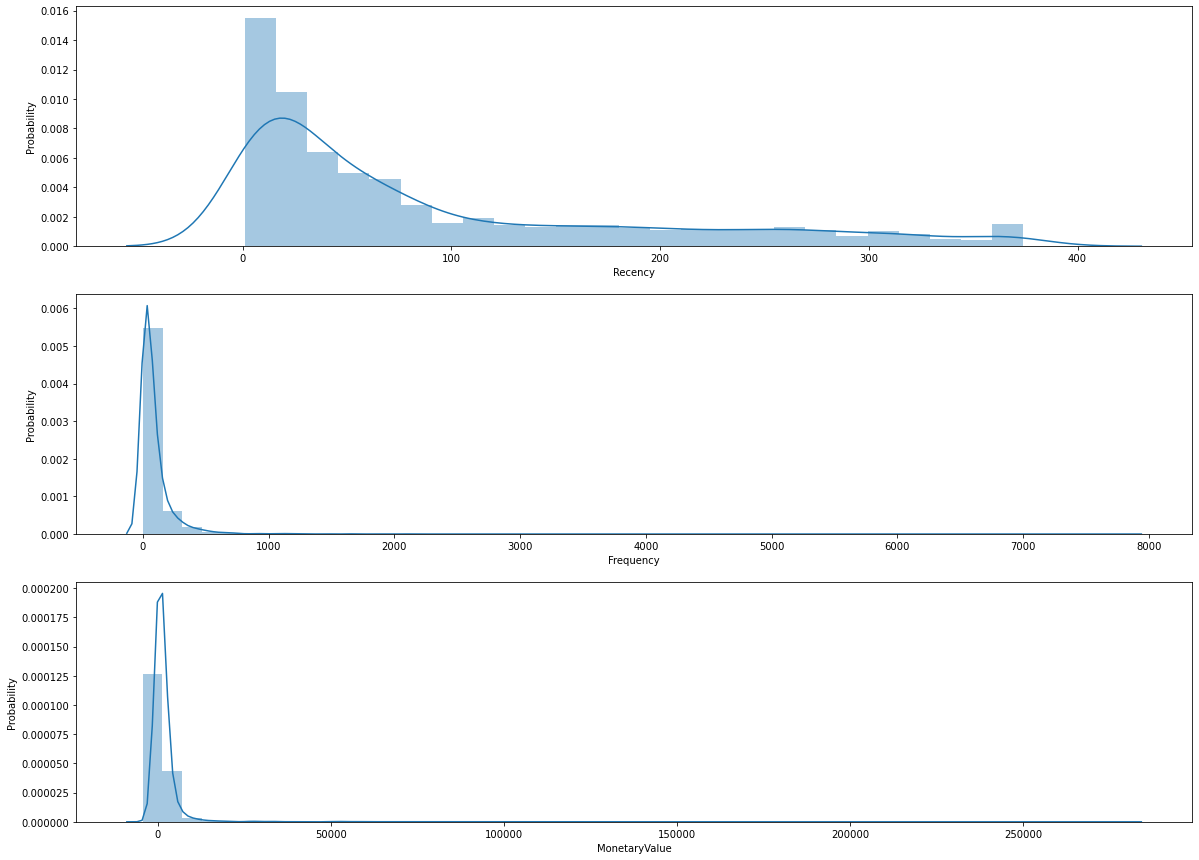

In [29]:
# Plot the RFM distribution 
plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
sns.distplot(RFM['Recency'])
plt.xlabel('Recency')
plt.ylabel('Probability')

plt.subplot(3,1,2)
sns.distplot(RFM['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Probability')

plt.subplot(3,1,3)
sns.distplot(RFM['MonetaryValue'])
plt.xlabel('MonetaryValue')
plt.ylabel('Probability')

plt.show()

### 3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

### b1. Combine three ratings to get a RFM segment (as strings).

### b2. Get the RFM score by adding up the three ratings.

### b3. Analyze the RFM segments by summarizing them and comment on the findings.

In [30]:
# Creating the rating by using the quartile function
rlabel = range(4,0,-1)
flabel = range(1,5)
mlabel = range(1,5)

# Using the quartile function and give rating.
r = pd.qcut(RFM["Recency"], q =4, labels = rlabel)
f = pd.qcut(RFM["Frequency"],q = 4, labels=flabel)
m = pd.qcut(RFM["MonetaryValue"],q = 4, labels=mlabel)

RFM["R"] = r.values
RFM["F"] = f.values
RFM["M"] = m.values

In [31]:
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [32]:
RFM['RFM_concat'] = RFM.apply(lambda x: str(x["R"]) + str(x["F"]) + str(x["M"]), axis=1)

In [33]:
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_concat
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0
12347.0,2,182,4310.00,4,4,4,4.04.04.0
12348.0,75,31,1797.24,2,2,4,2.02.04.0
12349.0,19,73,1757.55,3,3,4,3.03.04.0
12350.0,310,17,334.40,1,1,2,1.01.02.0


In [34]:
RFM["RFM_score"] = RFM.apply(lambda x: x['R'] + x['F'] + x['M'], axis=1)

In [35]:
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_concat,RFM_score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4


In [36]:
# Now on the basis of the score we will make the segment.
def segment(df):
    if df['RFM_score']>9:
        return "premiere"
    elif df['RFM_score']>7 and df['RFM_score']<10:
        return "Champions"
    elif df['RFM_score']>5 and df['RFM_score']<8:
        return "Loyal"
    elif df['RFM_score']>4 and df['RFM_score']<=5:
        return "Potential"
    elif df['RFM_score']>3 and df['RFM_score']<=4:
        return "Promissing"
    elif df['RFM_score']>2 and df['RFM_score']<=3:
        return "Need Atention"
    else:
        return "Require Activation"

In [37]:
RFM["RFM_segment"] = RFM.apply(segment, axis=1)

In [38]:
RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_concat,RFM_score,RFM_segment
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Need Atention
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,premiere
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Champions
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,premiere
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Promissing


<AxesSubplot:>

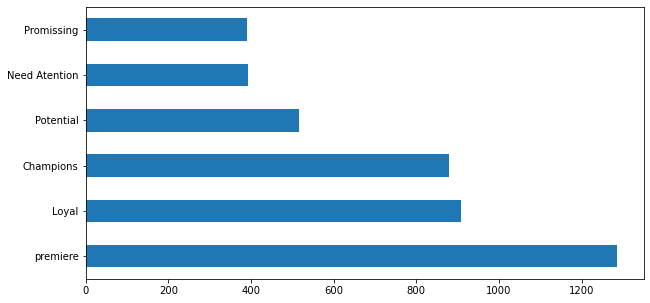

In [39]:
RFM["RFM_segment"].value_counts().plot(kind = "barh", figsize=(10, 5))

## Project Task: Week 3
## Data Modeling :

### 1. Create clusters using k-means clustering algorithm.

### a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

<AxesSubplot:xlabel='MonetaryValue'>

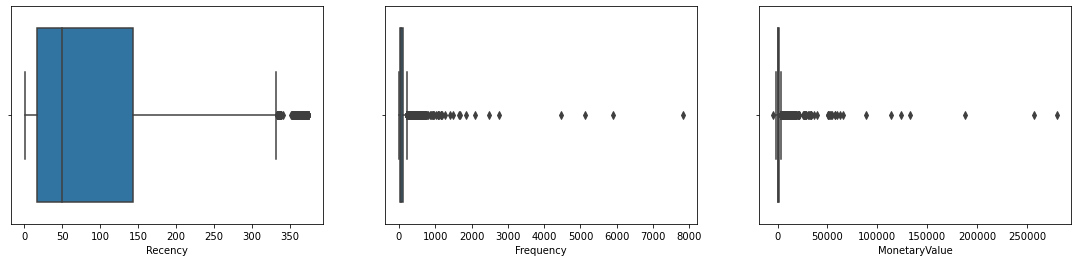

In [40]:
# First check the outlier
plt.figure(figsize=(19,4))
plt.subplot(1,3,1)
sns.boxplot(RFM['Recency'])

plt.subplot(1,3,2)
sns.boxplot(RFM['Frequency'])

plt.subplot(1,3,3)
sns.boxplot(RFM['MonetaryValue'])

There is otlier in our data set so we will drop the outlier

In [41]:
RFM_clust = RFM[(RFM['Frequency']<500) & (RFM['MonetaryValue']<50000)]

In [42]:
RFM_clust.shape

(4283, 9)

<AxesSubplot:xlabel='Recency', ylabel='Count'>

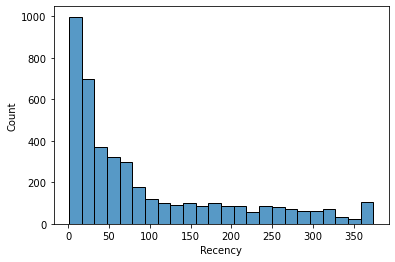

In [43]:
# let's first check the data is asymmetrically distributed or not.
sns.histplot(RFM_clust['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

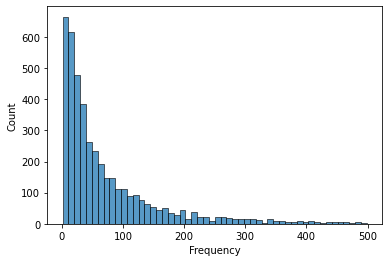

In [44]:
sns.histplot(RFM_clust['Frequency'])

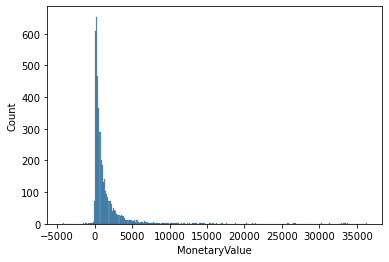

In [45]:
sns.histplot(RFM_clust['MonetaryValue'])
plt.show()

Form above graph it is clear data is highly skewed so we will apply log transformation to make data symmetric the data.

In [46]:
transform_rfm = pd.DataFrame()
transform_rfm["Recency"] = np.log(RFM_clust['Recency'])
transform_rfm["Frequency"] = np.log(RFM_clust['Frequency'])
transform_rfm["MonetaryValue"] = np.log(RFM_clust['MonetaryValue']-RFM_clust['MonetaryValue'].min()+1)

In [47]:
# let's make the standardize.
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

In [49]:
scaled_rfm = sc.fit_transform(transform_rfm)

In [50]:
scaled_rfm = pd.DataFrame(scaled_rfm, columns = ["Recency", "Frequency", "MonetaryValue"])
scaled_rfm.head()

,Recency,Frequency,MonetaryValue
0,1.397441,-2.290339,-0.767370
1,-2.141630,1.246250,1.571477
2,0.376515,-0.141475,0.409398
3,-0.577462,0.530013,0.387400
4,1.362476,-0.612492,-0.514928


### b. Decide the optimum number of clusters to be formed.

In [51]:
from sklearn.cluster import KMeans

In [52]:
km = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state=10)

In [53]:
clusters = km.fit_predict(scaled_rfm)

In [54]:
from sklearn.metrics import silhouette_score

silhouette_score(scaled_rfm, clusters)

0.2886421085562689

In [55]:
# Nom by using the elbow method we will get the optimul no of cluster.
inertia_list = []
for i in range(2,11):
    km = KMeans(n_clusters = i, random_state = 10)
    km.fit(scaled_rfm)
    inertia_list.append(km.inertia_)

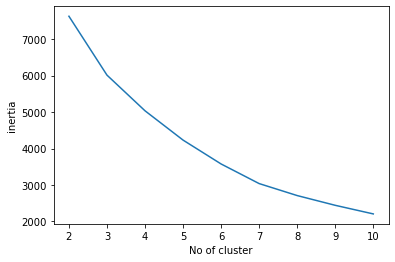

In [56]:
# Now plot the elbow curve.
plt.plot(range(2,11), inertia_list)
plt.xlabel("No of cluster")
plt.ylabel("inertia")
plt.show()

In [57]:
n_cluster = list(range(2,11))
inertia = pd.DataFrame(zip(n_cluster, inertia_list), columns = ["cluster", "inertia"])
inertia

,cluster,inertia
0,2,7627.132134
1,3,6013.142026
2,4,5034.654335
3,5,4231.276699
4,6,3576.477580
5,7,3038.846349
6,8,2710.213140
7,9,2443.021897
8,10,2207.119238


By analysis of grapg its getting difficult which would be optimul no of cluster because elbow bend is not clear.

In [58]:
silhouete_score = []

for i in range(2,11):
    km = KMeans(n_clusters = i, max_iter = 500, random_state = 10)
    cluster = km.fit_predict(scaled_rfm)
    score = silhouette_score(scaled_rfm, cluster)
    silhouete_score.append(score)

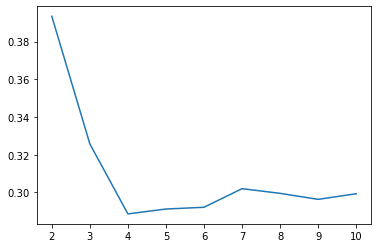

In [59]:
# Let's plot the silhouete_score graph.
plt.plot(range(2,11), silhouete_score)

In [60]:
km = KMeans(n_clusters = 2, init= "k-means++", max_iter=500, random_state= 500)

In [61]:
cluster = km.fit_predict(scaled_rfm)

In [62]:
silhouette_score(scaled_rfm, cluster)

0.3934322038543268

In [63]:
RFM_clust['labeled'] = km.labels_

In [64]:
RFM_clust

,Recency,Frequency,MonetaryValue,R,F,M,RFM_concat,RFM_score,RFM_segment,labeled
CustomerID,,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Need Atention,0
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,premiere,1
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Champions,0
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,premiere,1
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Promissing,0
...,...,...,...,...,...,...,...,...,...,...
18278.0,74,9,173.90,2,1,1,2.01.01.0,4,Promissing,0
18280.0,278,10,180.60,1,1,1,1.01.01.0,3,Need Atention,0
18281.0,181,7,80.82,1,1,1,1.01.01.0,3,Need Atention,0


### c. Analyze these clusters and comment on the results.

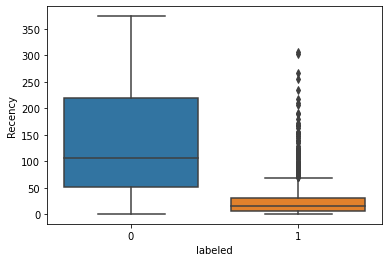

In [65]:
sns.boxplot(x='labeled', y='Recency', data=RFM_clust);

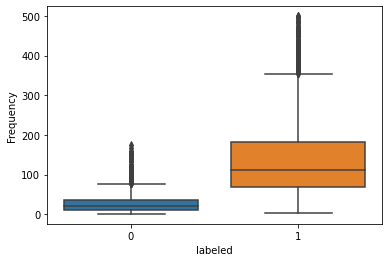

In [66]:
sns.boxplot(x='labeled', y='Frequency', data=RFM_clust);

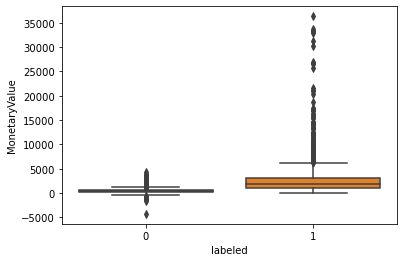

In [67]:
sns.boxplot(x='labeled', y='MonetaryValue', data=RFM_clust);

#### Result analysis
After analysing the customer it is clear that the customer in cluster 1 is loyal and frequently buy the product and also spend good amount whereas the customer in cluster 1 is week customer on which we need to give attention.

## Project Task: Week 4
## Data Reporting:

### 1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

c. Bar graph to show the count of orders vs. hours throughout the day

d. Plot the distribution of RFM values using histogram and frequency charts

e. Plot error (cost) vs. number of clusters selected

f. Visualize to compare the RFM values of the clusters using heatmap

In [68]:
# Converting the data frame into the excel to make dashboard in the tableau 
retail_df.to_excel('master_data.xlsx', sheet_name='master_data', index=False)
RFM_clust.to_excel('rfm_data.xlsx', sheet_name='rfm_data', index=False)
inertia.to_excel('inertia_data.xlsx', sheet_name='inertia', index=False)

# Please refer Tableau Dashboard for visualization and graphs